In [2]:
#Libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import math
from mpl_toolkits import mplot3d
import scipy, scipy.optimize
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm # to colormap 3D surfaces from blue to red

## Load Data

In [3]:
# Load Data(Edge)
file_location1 = r'C:\Users\sbadih\OneDrive - Gilead Sciences\Trodelvy 2.0 Modelling Data\Outputs\Design Space\data_log(Edge)_incr.xlsx'
assert os.path.isfile(file_location1)
df1 = pd.read_excel(file_location1,sheet_name='data_log(Edge)_incr')
print("Headers:")
print(list(df1.columns))

Headers:
['Unnamed: 0', 'Shelf Temperature(C)', 'Chamber Pressure(mTorr)', 'Drying Time(Hrs)', 'Product Temperature(C)', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']


In [4]:
# Load Data(Core)
file_location2 = r'C:\Users\sbadih\OneDrive - Gilead Sciences\Trodelvy 2.0 Modelling Data\Outputs\Design Space\data_log(Core)_incr.xlsx'
assert os.path.isfile(file_location2)
df2 = pd.read_excel(file_location2,sheet_name='data_log(Core)_incr')
print("Headers:")
print(list(df2.columns))

Headers:
['Unnamed: 0', 'Shelf Temperature(C)', 'Chamber Pressure(mTorr)', 'Drying Time(Hrs)', 'Product Temperature(C)']


In [5]:
#Define Variables(df1)-Edge
temp1=(df1[['Shelf Temperature(C)']]).values #Shelf Temp.
press1=(df1[['Chamber Pressure(mTorr)']]).values #Chamber Press.
dt1= (df1[['Drying Time(Hrs)']]).values#Predicted Drying Time
tp1= (df1[['Product Temperature(C)']]).values#Predicted Product Temp.

In [6]:
#Define Variables(df2)-Core
temp2=(df2[['Shelf Temperature(C)']]).values #Shelf Temp.
press2=(df2[['Chamber Pressure(mTorr)']]).values #Chamber Press.
dt2= (df2[['Drying Time(Hrs)']]).values#Predicted Drying Time
tp2= (df2[['Product Temperature(C)']]).values#Predicted Product Temp.

## Surface Fitting

### Edge Cases

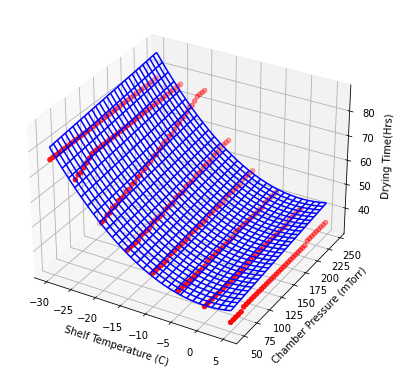

Parameters for Predicting Drying Time : [3.50228704e+01 2.87898687e-02 4.93456486e-02]
Covariance:
 [[ 7.52211503e-01 -3.96521258e-03 -2.70571607e-04]
 [-3.96521258e-03  2.68827973e-05  4.04968860e-14]
 [-2.70571607e-04  4.04968858e-14  9.41118622e-07]]


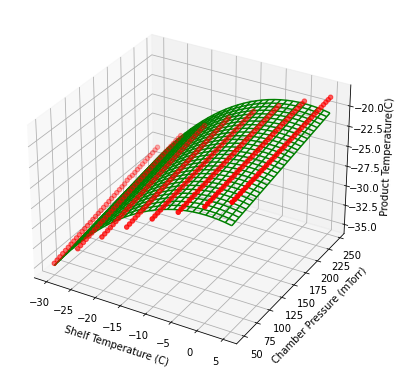

Parameters for Predicting Product Temperature : [-2.36868950e+01  1.41761728e-02 -1.33618429e-02]
Covariance:
 [[ 3.59287100e-02 -1.89394832e-04 -1.29236109e-05]
 [-1.89394832e-04  1.28403276e-06  3.49947982e-15]
 [-1.29236109e-05  3.49947972e-15  4.49516880e-08]]


In [10]:
#Plot (Edge more data points)
data=[dt1,tp1]
title=["Drying Time","Product Temperature"]
label=["Drying Time(Hrs)",'Product Temperature(C)']
c=["b","g"]
p_e=np.zeros((3,3))
for i in range(2):    
    # test function
    def function(data,a, b, c):
        x = data[0]
        y = data[1]
        return (y*b) + (x*x*c)+a
        
    #Data
    x_data=temp1.reshape(-1).tolist()
    y_data=press1.reshape(-1).tolist()
    z_data=data[i].reshape(-1).tolist()

    # get fit parameters from scipy curve fit
    parameters_e, covariance_e = curve_fit(function, [x_data, y_data], z_data, maxfev=100000)

    # create surface function model
    # setup data points for calculating surface model
    model_x_data = np.linspace(min(x_data), max(x_data), 30)
    model_y_data = np.linspace(min(y_data), max(y_data), 30)
    # create coordinate arrays for vectorized evaluations
    X, Y = np.meshgrid(model_x_data, model_y_data)
    # calculate Z coordinate array
    Z = function(np.array([X, Y]), *parameters_e)

    # setup figure object
    fig = plt.figure(figsize=(5,8))
    # setup 3d object
    ax = Axes3D(fig)
    # plot surface
    #ax.plot_surface(X, Y, Z,cmap="Greens")
    ax.plot_wireframe(X, Y, Z,color=c[i])

    # plot input data
    ax.scatter(x_data, y_data, z_data, color="red")
    # set plot descriptions
    ax.set_ylabel('Chamber Pressure (mTorr)')
    ax.set_xlabel('Shelf Temperature (C)')
    ax.set_zlabel(label[i])
    # rotate the axes and update
    for angle in range(0,0):
        ax.view_init(30, angle)
    plt.show()
    print("Parameters for Predicting",title[i],":",parameters_e)
    print("Covariance:\n",covariance_e)
    #Store Parameters
    p_e[i,:]=parameters_e

### Core Case

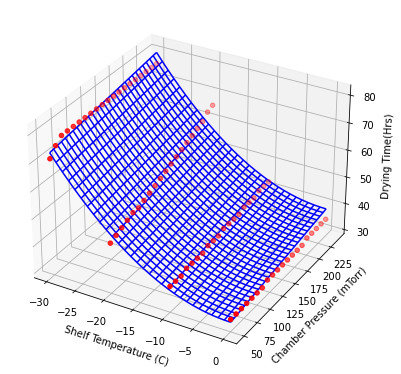

Parameters for Predicting Drying Time : [30.09614662  0.0368985   0.0457602 ]
Covariance:
 [[ 7.03380677e-01 -3.68528272e-03 -2.41449540e-04]
 [-3.68528272e-03  2.54157431e-05 -7.00833927e-14]
 [-2.41449540e-04 -7.00833951e-14  6.89855856e-07]]


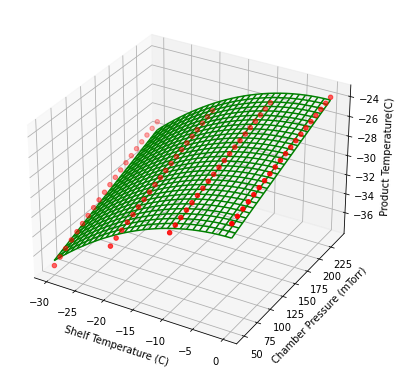

Parameters for Predicting Product Temperature : [-3.01302241e+01  2.51009364e-02 -8.73301832e-03]
Covariance:
 [[ 5.93184519e-02 -3.10792251e-04 -2.03622507e-05]
 [-3.10792251e-04  2.14339485e-06 -3.14848836e-15]
 [-2.03622507e-05 -3.14848851e-15  5.81778606e-08]]


In [11]:
#Plot (Core)
data=[dt2,tp2]
title=["Drying Time","Product Temperature"]
label=["Drying Time(Hrs)",'Product Temperature(C)']
c=["b","g"]
p_c=np.zeros((3,3))
for i in range(2):    
    # test function
    def function(data,a, b, c):
        x = data[0]
        y = data[1]
        return (y*b) + (x*x*c)+a
        #return b*x+c*y+a #Linear Plane
    #Data
    x_data=temp2.reshape(-1).tolist()
    y_data=press2.reshape(-1).tolist()
    z_data=data[i].reshape(-1).tolist()

    # get fit parameters from scipy curve fit
    parameters_c, covariance_c = curve_fit(function, [x_data, y_data], z_data, maxfev=100000)

    # create surface function model
    # setup data points for calculating surface model
    model_x_data = np.linspace(min(x_data), max(x_data), 30)
    model_y_data = np.linspace(min(y_data), max(y_data), 30)
    # create coordinate arrays for vectorized evaluations
    X, Y = np.meshgrid(model_x_data, model_y_data)
    # calculate Z coordinate array
    Z = function(np.array([X, Y]), *parameters_c)

    # setup figure object
    fig = plt.figure(figsize=(5,8))
    # setup 3d object
    ax = Axes3D(fig)
    # plot surface
    #ax.plot_surface(X, Y, Z,cmap="Greens")
    ax.plot_wireframe(X, Y, Z,color=c[i])

    # plot input data
    ax.scatter(x_data, y_data, z_data, color="red")
    # set plot descriptions
    ax.set_ylabel('Chamber Pressure (mTorr)')
    ax.set_xlabel('Shelf Temperature (C)')
    ax.set_zlabel(label[i])
    # rotate the axes and update
    for angle in range(0,0):
        ax.view_init(30, angle)
    plt.show()
    print("Parameters for Predicting",title[i],":",parameters_c)
    print("Covariance:\n",covariance_c)
    p_c[i,:]=parameters_c

## Predict

#### Here is where you can set any shelf temperature and pressure combination and predict the outputs

### Core

In [17]:
#Core Parameters(copied from top output)
a_d_core=p_c[0,0]  #30.09614662  
b_d_core=p_c[0,1]  #0.0368985
c_d_core= p_c[0,2]  #0.0457602
a_t_core=p_c[1,0] #-3.01302241e+01
b_t_core=p_c[1,1] #2.51009364e-02
c_t_core= p_c[1,2] #-8.73301832e-03

### Edge

In [18]:
#Edge Parameters(copied from top output)
a_d_edge=p_e[0,0] #3.50228704e+01 
b_d_edge=p_e[0,1] #2.87898687e-02
c_d_edge=p_e[0,2] #4.93456486e-02
a_t_edge=p_e[1,0] #-2.36868950e+01
b_t_edge=p_e[1,1] #1.41761728e-02
c_t_edge=p_e[1,2] #-1.33618429e-02

In [19]:
#Define function used for predicting
def predict(Ts, Pc, a, b, c):
    return (Pc*b) + (Ts*Ts*c)+a

### Predict Core

In [20]:
#Predict outputs(Core)

#Set Chamber Pressure and Shelf Temperature of interest (Change these manually)
Ts = float(input("Enter Shelf Temperature(C): ")) #-10
print(Ts)
Pc = float(input("Enter Chamber Pressure(mTorr): ")) #100
print(Pc)

#Predict Drying Time for Core
p1=predict(Ts,Pc,a_d_core,b_d_core,c_d_core)
print("Predicted Drying Time for Core Vial:",p1,"Hrs")

#Predict product temperature for Core
p2=predict(Ts,Pc,a_t_core,b_t_core,c_t_core)
print("Predicted Product Temperature for Core Vial:",p2,"C")

Enter Shelf Temperature(C): 0
0.0
Enter Chamber Pressure(mTorr): 125
125.0
Predicted Drying Time for Core Vial: 34.708458646417455 Hrs
Predicted Product Temperature for Core Vial: -26.992607073092955 C
Predicted Drying Time for Edge Vial: 38.6216039810538 Hrs
Predicted Product Temperature for Edge Vial: -21.91487339516494 Hrs


### Predict Edge

In [ ]:
#Predict Outputs (Edge)

#Set Chamber Pressure and Shelf Temperature of interest (Change these manually)
Ts = float(input("Enter Shelf Temperature(C): ")) #-10
print(Ts)
Pc = float(input("Enter Chamber Pressure(mTorr): ")) #100
print(Pc)

#Predict Drying Time for Edge
p3=predict(Ts,Pc,a_d_edge,b_d_edge,c_d_edge)
print("Predicted Drying Time for Edge Vial:",p3,"Hrs")

#Predict Product temperature for Edge
p4=predict(Ts,Pc,a_t_edge,b_t_edge,c_t_edge)
print("Predicted Product Temperature for Edge Vial:",p4,"Hrs")

## Extra Analysis

#### This section was used to perform backcalculations of drying time if the product temperature was set to be one degree below the collapse temperature

In [116]:
Tc= -21.2 #Collapse temp for F2

#Based on the excel sheet outputs, extracted what the Pc and Shelf Temperature was at Tp=Tc-1
Tp=-20.2191346391167
Ts=0
Pc=215

#Predict the drying time
prediction=predict(Ts,Pc,a_d_edge,b_d_edge,c_d_edge)
print("Drying Time Prediction for F2 at Tc-1:",prediction,"Hrs")

Drying Time Prediction for F2 at Tc-1: 41.212692170500006 Hrs
